In [12]:
import kagglehub
import numpy as np
import csv
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    precision_recall_fscore_support,
    confusion_matrix
)

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Download latest version of dataset
path = kagglehub.dataset_download("uciml/sms-spam-collection-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'sms-spam-collection-dataset' dataset.
Path to dataset files: /kaggle/input/sms-spam-collection-dataset


In [3]:
# Load and preprocess dataset
dataset_path = "/kaggle/input/sms-spam-collection-dataset/spam.csv"

with open(dataset_path, 'r', encoding='latin-1') as f:
    reader = csv.reader(f)
    rows = list(reader)

if rows[0][0].lower() == "v1":
    rows = rows[1:]

data = np.array([[r[0], r[1]] for r in rows], dtype=object)
labels = data[:, 0]
messages = data[:, 1]

labels = np.where(labels == "spam", 1, 0)
print(labels.shape)
print(messages.shape)

(5572,)
(5572,)


In [4]:
# Split and vectorize dataset
X_train, X_rest, y_train, y_rest = train_test_split(messages, labels, test_size=0.3, random_state=42)

X_validate, X_test, y_validate, y_test = train_test_split(X_rest, y_rest, test_size=0.5, random_state=42)

vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_validate_vec = vectorizer.transform(X_validate)
X_test_vec = vectorizer.transform(X_test)

In [5]:
# Train model based on regularization strength
C_values = [0.01, 0.1, 1, 10, 100]
results = {
    "accuracy": [],
    "precision": [],
    "recall": [],
    "f1": []
}

# Iterate through C values and predict validation data
for C in C_values:
    model = LogisticRegression(max_iter=200, C=C, solver="liblinear")
    model.fit(X_train_vec, y_train)
    preds = model.predict(X_validate_vec)

    acc = accuracy_score(y_validate, preds)
    prec, rec, f1, _ = precision_recall_fscore_support(
        y_validate, preds, average="binary", zero_division=0
    )

    results["accuracy"].append(acc)
    results["precision"].append(prec)
    results["recall"].append(rec)
    results["f1"].append(f1)

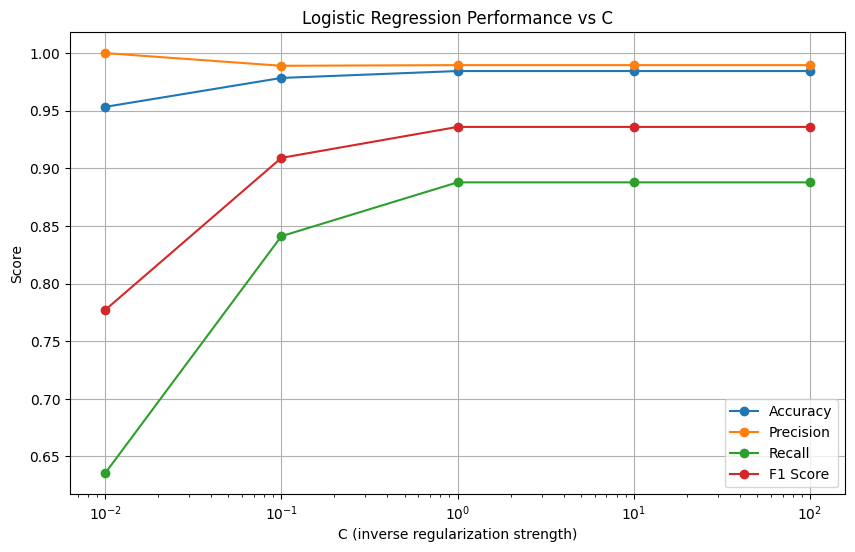

In [6]:
# Evaluate model
plt.figure(figsize=(10,6))

plt.plot(C_values, results["accuracy"], marker='o', label="Accuracy")
plt.plot(C_values, results["precision"], marker='o', label="Precision")
plt.plot(C_values, results["recall"], marker='o', label="Recall")
plt.plot(C_values, results["f1"], marker='o', label="F1 Score")

plt.xscale('log')
plt.xlabel("C (inverse regularization strength)")
plt.ylabel("Score")
plt.title("Logistic Regression Performance vs C")
plt.grid(True)
plt.legend()

plt.show()


The C value (inverse regularization strength) impacts the loss function in logistic regression by regularizing the process. This can prevent overfitting and can keep weights relatively low. However, the larger C is, the less regularization occurs, leading to possible overfitting.

Accuracy: 0.972488038277512
Precision: 0.978494623655914
Recall: 0.8125
F1 Score: 0.8878048780487805


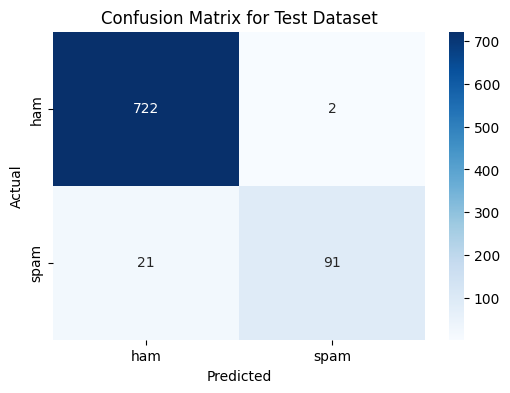

In [19]:
# Test model
model = LogisticRegression(max_iter=200, C=1, solver="liblinear")
model.fit(X_train_vec, y_train)
preds = model.predict(X_test_vec)

acc = accuracy_score(y_test, preds)
prec, rec, f1, _ = precision_recall_fscore_support(
    y_test, preds, average="binary", zero_division=0
)

print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1 Score:", f1)

# Confusion Matrix
cm = confusion_matrix(y_test, preds)

plt.figure(figsize=(6,4))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["ham", "spam"],
    yticklabels=["ham", "spam"]
)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Test Dataset")
plt.show()


In [22]:
# Check errors
label_map = {0: "ham", 1: "spam"}

misclassified_mask = preds != y_test

misclassified_messages = X_test[misclassified_mask]
misclassified_true = y_test[misclassified_mask]
misclassified_pred = preds[misclassified_mask]

misclassified_df = pd.DataFrame({
    "message": misclassified_messages,
    "true_label": [label_map[x] for x in misclassified_true],
    "predicted_label": [label_map[x] for x in misclassified_pred]
})

misclassified_df

,message,true_label,predicted_label
0,"Did you hear about the new \Divorce Barbie\""? ...",spam,ham
1,Hi I'm sue. I am 20 years old and work as a la...,spam,ham
2,88066 FROM 88066 LOST 3POUND HELP,spam,ham
3,The current leading bid is 151. To pause this ...,spam,ham
4,"Hi babe its Chloe, how r u? I was smashed on s...",spam,ham
5,"Hi hope u get this txt~journey hasnt been gd,n...",ham,spam
6,Hi its LUCY Hubby at meetins all day Fri & I w...,spam,ham
7,INTERFLORA - åÒIt's not too late to order Inte...,spam,ham
8,(Bank of Granite issues Strong-Buy) EXPLOSIVE ...,spam,ham
9,Miss call miss call khelate kintu opponenter m...,ham,spam


In [25]:
# Check features
feature_names = vectorizer.get_feature_names_out()
coefs = model.coef_[0]

# Top spam-indicating words
print("Spam words", sorted(zip(coefs, feature_names), reverse=True)[:20])

# Top ham-indicating words
print("Ham words", sorted(zip(coefs, feature_names))[:20])

Spam words [(np.float64(2.134190007524281), 'txt'), (np.float64(1.6876380071499222), 'text'), (np.float64(1.6012827409633084), 'call'), (np.float64(1.5702197267280058), 'reply'), (np.float64(1.4819936682218589), 'ringtone'), (np.float64(1.429529625450795), '50'), (np.float64(1.3447678350544303), 'new'), (np.float64(1.319902399167815), 'mobile'), (np.float64(1.3056150139884586), 'won'), (np.float64(1.2842187481602259), 'uk'), (np.float64(1.2545219150992628), 'claim'), (np.float64(1.159880090560518), 'free'), (np.float64(1.113117411678214), 'chat'), (np.float64(1.1124243085952967), 'service'), (np.float64(1.0970990371337201), 'www'), (np.float64(1.0827054311579263), 'http'), (np.float64(1.0800640434461835), 'stop'), (np.float64(1.0332884157962803), 'prize'), (np.float64(1.0211294876664687), 'sms'), (np.float64(0.9971646370263532), 'co')]
Ham words [(np.float64(-1.2593411939163768), 'my'), (np.float64(-1.100209349513042), 'me'), (np.float64(-1.0351191742382304), 'gt'), (np.float64(-0.9872

In [ ]:
import joblib

# Save model for deployment
model = LogisticRegression(max_iter=200, solver="liblinear")
model.fit(X_train_vec, y_train)

joblib.dump(vectorizer, "vectorizer.pkl")
joblib.dump(model, "model.pkl")

['model.pkl']